# Modelling - Clustering

In this notebook, I apply three different clustering algorithms - KMeans, DBSCAN and Agglomerative Clustering, to the preprocessed data, and subsequently select the best model among these. 

**Contents:**
- [Imports](#Import-libraries-and-data)
- [Preprocessing](#Preprocessing)
- [KMeans](#KMeans)
- [DBSCAN](#DBSCAN)
- [Agglomerative Clustering](#Agglomerative-clustering)
- [Model Selection and Conclusion](#Model-Selection-and-Conclusion)
- [References](#References)

### Import libraries and data

In [8]:
#import libraries
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import sys
!{sys.executable} -m pip install plotly
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
!{sys.executable} -m pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from itertools import product
from sklearn.metrics import silhouette_score
from prettytable import PrettyTable

%matplotlib inline

In [10]:
#import data
phones = pd.read_csv('../data/phones_clean.csv')
print("=================== Top 5 rows of dataset ===================")
display(phones.head())
print("=================== Shape of dataset ===================")
print(phones.shape)
print("=================== Data types in dataset ===================")
print(phones.dtypes)
print("=================== Description of data in dataset ===================")
display(phones.describe())

=================== Top 5 rows of dataset ===================


,sales,profit,shipping_cost,unit_price,profit_per_unit,quantity,discount,heavy_discount,heavy_discount_regions,non_profitable,non_profitable_regions,more_qty,more_qty_regions,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,segment_Consumer,segment_Corporate,segment_Home Office,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium,region_Canada,region_Caribbean,region_Central Africa,region_Central America,region_Central Asia,region_Central US,region_Eastern Africa,region_Eastern Asia,region_Eastern Europe,region_Eastern US,region_North Africa,region_Northern Europe,region_Oceania,region_South America,region_Southeastern Asia,region_Southern Africa,region_Southern Asia,region_Southern Europe,region_Southern US,region_Western Africa,region_Western Asia,region_Western Europe,region_Western US
0,221.980,62.1544,40.770,110.990,31.0772,2,0.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,668.160,75.1680,45.740,74.240,8.3520,9,0.2,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2043.720,756.0000,321.360,145.980,54.0000,14,0.0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2125.000,297.5000,316.764,425.000,59.5000,5,0.0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,470.376,52.9173,137.410,156.792,17.6391,3,0.2,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


=================== Shape of dataset ===================
(3073, 52)
=================== Data types in dataset ===================
sales                       float64
profit                      float64
shipping_cost               float64
unit_price                  float64
profit_per_unit             float64
quantity                      int64
discount                    float64
heavy_discount                int64
heavy_discount_regions        int64
non_profitable                int64
non_profitable_regions        int64
more_qty                      int64
more_qty_regions              int64
market_Africa                 int64
market_Asia Pacific           int64
market_Europe                 int64
market_LATAM                  int64
market_USCA                   int64
segment_Consumer              int64
segment_Corporate             int64
segment_Home Office           int64
ship_mode_First Class         int64
ship_mode_Same Day            int64
ship_mode_Second Class        int64
ship_m

,sales,profit,shipping_cost,unit_price,profit_per_unit,quantity,discount,heavy_discount,heavy_discount_regions,non_profitable,non_profitable_regions,more_qty,more_qty_regions,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,segment_Consumer,segment_Corporate,segment_Home Office,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium,region_Canada,region_Caribbean,region_Central Africa,region_Central America,region_Central Asia,region_Central US,region_Eastern Africa,region_Eastern Asia,region_Eastern Europe,region_Eastern US,region_North Africa,region_Northern Europe,region_Oceania,region_South America,region_Southeastern Asia,region_Southern Africa,region_Southern Asia,region_Southern Europe,region_Southern US,region_Western Africa,region_Western Asia,region_Western Europe,region_Western US
count,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000
mean,364.724233,40.863466,38.492055,109.098274,11.184157,3.491702,0.148994,0.191019,0.069639,0.239831,0.069639,0.600390,0.888383,0.070615,0.250895,0.193622,0.194273,0.290596,0.510251,0.313375,0.176375,0.138301,0.046209,0.205988,0.609502,0.070615,0.300683,0.043606,0.585096,0.005857,0.032541,0.010088,0.106736,0.004881,0.064432,0.010088,0.034494,0.023430,0.086560,0.018549,0.036772,0.063781,0.054995,0.059226,0.007485,0.048161,0.036446,0.044582,0.024406,0.040351,0.096974,0.089164
std,376.282197,118.699060,46.799308,94.828719,33.505826,2.228196,0.189178,0.393168,0.254579,0.427050,0.254579,0.489898,0.314946,0.256222,0.433599,0.395200,0.395704,0.454111,0.499976,0.463941,0.381201,0.345272,0.209971,0.404487,0.487941,0.256222,0.458630,0.204249,0.492786,0.076322,0.177462,0.099947,0.308828,0.069706,0.245561,0.099947,0.182524,0.151289,0.281235,0.134946,0.188232,0.244403,0.228008,0.236085,0.086203,0.214142,0.187429,0.206417,0.154331,0.196814,0.295970,0.285026
min,2.970000,-685.752000,1.050000,1.584000,-160.708000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.090000,1.198800,9.710000,51.992000,0.517300,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249.060000,27.196000,21.700000,83.862000,10.079200,3.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,459.360000,77.550000,47.160000,

In [11]:
#from iterations of combinations of features, drop those that are not essential for clustering.
phones_imptfeat = phones.drop(columns = ['heavy_discount','profit_per_unit','non_profitable','more_qty_regions', 'market_Africa', 'market_Asia Pacific',
       'market_Europe', 'market_LATAM', 'market_USCA', 'segment_Consumer',
       'segment_Corporate', 'segment_Home Office', 'ship_mode_First Class',
       'ship_mode_Same Day', 'ship_mode_Second Class',
       'ship_mode_Standard Class', 'order_priority_Critical',
       'order_priority_High', 'order_priority_Low', 'order_priority_Medium',
       'region_Canada', 'region_Caribbean', 'region_Central Africa',
       'region_Central America', 'region_Central Asia', 'region_Central US',
       'region_Eastern Africa', 'region_Eastern Asia', 'region_Eastern Europe',
       'region_Eastern US', 'region_North Africa', 'region_Northern Europe',
       'region_Oceania', 'region_South America', 'region_Southeastern Asia',
       'region_Southern Africa', 'region_Southern Asia',
       'region_Southern Europe', 'region_Southern US', 'region_Western Africa',
       'region_Western Asia', 'region_Western Europe', 'region_Western US'])

### Modelling
Model and determine silhouette score for each algorithm to determine the ideal number of clusters. 

#### KMeans
For this clustering algorithm, I have to feed the number of clusters. I input a range of cluster numbers (2 to 10) to view the score for each cluster numbers, and assess the silhouette score to determine the best number of the clusters. 

In [12]:
# separate numerical from categorical variables
phones_num = phones_imptfeat[phones_imptfeat.columns[:6]]
phones_cat = phones_imptfeat[phones_imptfeat.columns[6:]]

In [13]:
# standard scale as kmeans is a distance based algo
ss = MinMaxScaler(feature_range = (0,1))
phones_num_ss = ss.fit_transform(phones_num)
phones_num_ss = pd.DataFrame(phones_num_ss, columns = phones_num.columns)

In [14]:
# merge with categorical var
phones_processed = pd.concat([phones_num_ss, phones_cat], axis=1)
# preview data 
phones_processed.head()

,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty
0,0.083784,0.518748,0.124005,0.186754,0.076923,0.000000,0,0,0
1,0.254473,0.527775,0.139521,0.124023,0.615385,0.285714,0,0,1
2,0.780703,1.000000,1.000000,0.246482,1.000000,0.000000,0,0,1
3,0.811797,0.681984,0.985651,0.722765,0.307692,0.000000,0,0,1
4,0.178809,0.512341,0.425713,0.264938,0.153846,0.285714,0,0,1


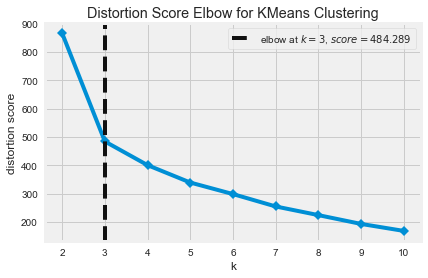

Wall time: 844 ms


In [15]:
%%time
km = KMeans()
elbow_viz = KElbowVisualizer(km, k=(2,11), timings = False)
# fit and draw
elbow_viz.fit(phones_processed)
elbow_viz.poof()
plt.show()

**Distortion score** is the sum of squared distances from each point to its assigned center (ie. sum of squared errors). The elbow method seeks to identify a point as number of clusters increase, where the distortion score start to flatten, forming the elbow. This is determined to be the ideal number of clusters for the data.

The above graph shows that 3 clusters is ideal. The elbow method mostly serves as a guide, and should be considered alongside **silhouette score**.

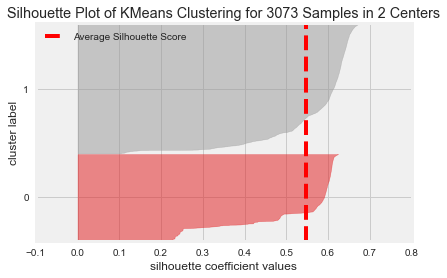

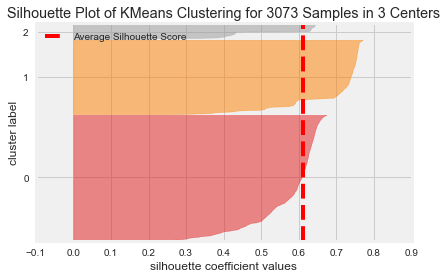

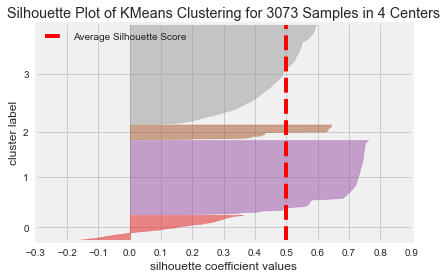

In [16]:
for i in range(2,5):
    km_set = KMeans(i)
    sil_viz = SilhouetteVisualizer(km_set)
    sil_viz.fit(phones_processed)    
    sil_viz.poof()
    plt.show()

Highest silhouette score of about 0.61 achieved through 3 clusters. This is aligned with the clusters obtained using the elbow method, so we will move forward with 3 clusters.

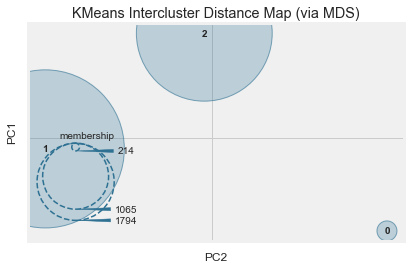

In [17]:
# visualise intercluster distance
km_intercluster = KMeans(3)
intclus_viz = InterclusterDistance(km_intercluster)
intclus_viz.fit(phones_processed)   
intclus_viz.show();

Very distinct groups based on the intercluster distance. This is good news as it implies that the characteristics of transactions in each cluster is different from other clusters. 

In [18]:
# based on selected number of clusters, assign cluster labesl to original dataframe 
km = KMeans(n_clusters = 3, max_iter = 50) 
km.fit(phones_processed)
# get cluster labels
cluster_labels = km.labels_
# append cluster labels to dataframe with original values
phones_imptfeat_km = phones_imptfeat.copy()
phones_imptfeat_km = phones_imptfeat_km.assign(cluster = cluster_labels)
# print silhouette score 
print("=================== Silhouette Score ===================")
print(silhouette_score(phones_processed, km.labels_))
#preview df 
print("=================== Final dataframe ===================")
display(phones_imptfeat_km.head())

=================== Silhouette Score ===================
0.6099807533527721
=================== Final dataframe ===================


,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty,cluster
0,221.980,62.1544,40.770,110.990,2,0.0,0,0,0,2
1,668.160,75.1680,45.740,74.240,9,0.2,0,0,1,1
2,2043.720,756.0000,321.360,145.980,14,0.0,0,0,1,1
3,2125.000,297.5000,316.764,425.000,5,0.0,0,0,1,1
4,470.376,52.9173,137.410,156.792,3,0.2,0,0,1,1


In [21]:
#view how each clusters differs across features
def barplot_clusters(data):
    '''function that plots features against cluster labels'''
    for i in data.columns:
        sns.barplot(data = data, x = 'cluster', y = i, ci = None)
        plt.xticks(ticks =[0,1,2],labels = ['1','2','3'])
        plt.show()

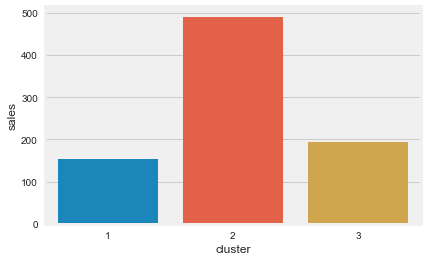

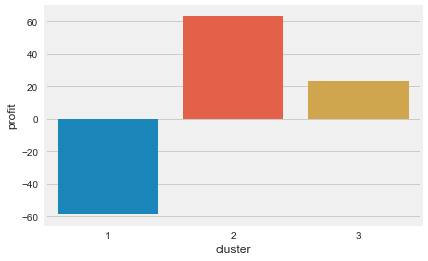

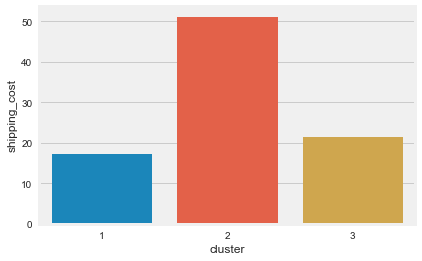

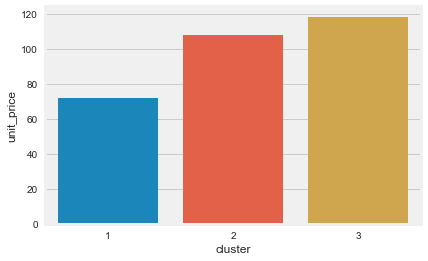

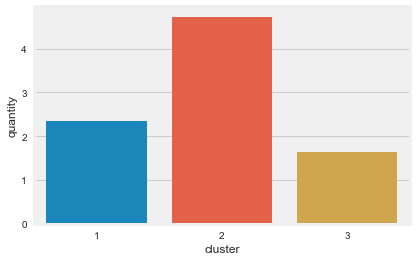

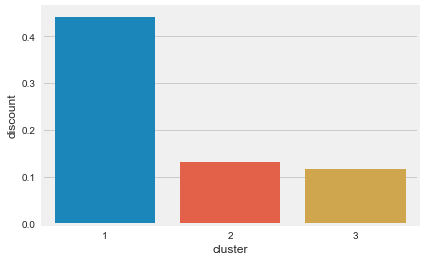

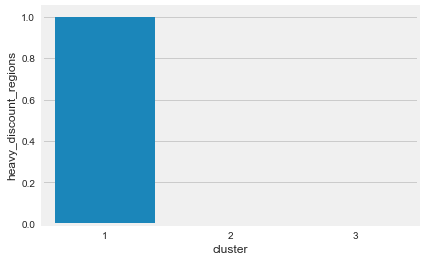

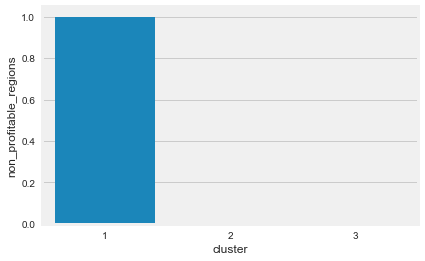

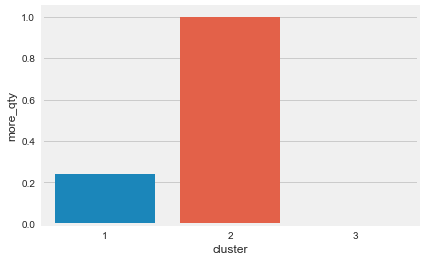

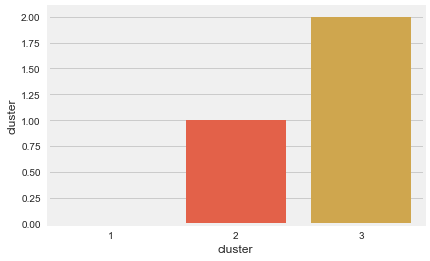

In [24]:
barplot_clusters(phones_imptfeat_km)

In [25]:
# view mean vlaues by cluster
stats_cluster = phones_imptfeat_km.groupby('cluster').mean()
stats_cluster.head()

,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty
cluster,,,,,,,,,
0,154.809981,-58.450486,17.146449,72.039533,2.341121,0.441589,1.0,1.0,0.238318
1,491.024800,63.055888,51.162535,108.073426,4.730212,0.132564,0.0,0.0,1.000000
2,194.149992,23.436218,21.437708,118.271184,1.636620,0.117878,0.0,0.0,0.000000


- There are some distinct features between the clusters. 


| Feature | **Cluster 1** | **Cluster 2** | **Cluster 3** |
| :----: | :-------- | :-------- | :------- |
| Sales | Highest sales compared to other clusters with mean of about ~USD500 | Average sales of ~USD200 | Average sales of ~USD160 |
| Profit | Most profitable cluster | Half as profitable cluster | Non-profitable cluster |
| Shipping Cost | Highest shipping cost imposed | Half the shipping cost as Cluster 1 | About half the shipping cost as Cluster 1 or lesser |
| Quantity | Highest quantity purchased | Lower average quantity at about 1-2 | Lower average quantity purchased at about 2|
| Discount | Relatively low discount average at about 0.1% | Similar to Cluster 1 | Huge discounts >0.4% |
| Presence of heavy discounts | None | None | Heavy discounts |
| Profitable? | Profitable | Profitable | Non-profitable |

#### DBSCAN
Density-Based Spatial Clustering of Application with Noise (DBSCAN) is well-suited for clustering data with minimal domain knowledge (unlike iterating for best value of `k` in Kmeans), discovering clusters with arbitrary shapes and efficient on large databases. 

It takes on two parameters, epsilon (eps) and minimum samples (min_samples), which we can determine the optimal values (Maklin, 2019) using nearest neighbours. 

In [67]:
# instantiate and fit nearest neighbours
nn = NearestNeighbors(n_neighbors = 2)
nn = nn.fit(phones_processed)
distances, indices = nn.kneighbors(phones_processed)

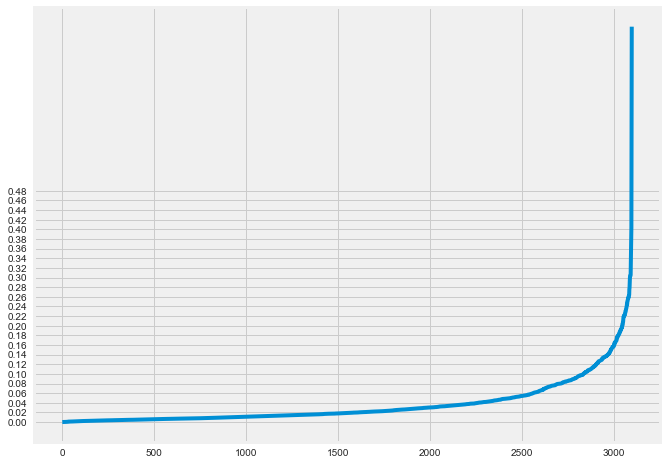

In [68]:
# plot results 
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize = (10,8))
plt.plot(distances)
plt.yticks(np.arange(0,0.5,0.02))
plt.show()

- Optimal value of eps is at point of maximum curvature, in this case, 0.18

In [69]:
phones_processed.shape

(3096, 9)

In [70]:
# %%time
# # create params for minimum samples
# min_samples = [3, 10, 100, 500, 1000]
# # create table 
# x = PrettyTable(title = 'Silhouette Score on parameters and clusters', header_style = 'title', max_table_width = 110)
# x.field_names = ['Number of Clusters', 'Param - Minimum Samples', 'Silhouette Score']
# for i in min_samples:
#     dbscan = DBSCAN(eps=0.14, min_samples = i)
#     dbscan.fit(phones_processed) #fit
#     x.add_row([len(np.unique(dbscan.labels_)), i, round(silhouette_score(phones_processed, dbscan.labels_),3)])
# #print table with scores
# print(x)

Running it on DBSCAN resulted in an error, as there is only one label set using DBS. This suggests that the points are probably very close together such that the model is unable to set more than one cluster to the data.  

### Agglomerative Clustering
Groups objects based on their similarity. It works in a "bottom-up" manner whereby each object is initially considered as a single element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This process is repeated until all points are a member of a single big cluster (Datanovia, n.d.)

In [27]:
%%time
scores = []
range_n_clusters = range(2,11) #run model on 2 clusters up to 20 clusters
y = PrettyTable(title = 'Silhouette Score on Clusters (Agglomerative Clustering)', header_style = 'title', max_table_width = 110)
y.field_names = ['Number of Clusters', 'Silhouette Score']
for cluster in range_n_clusters:
    agglo = AgglomerativeClustering(n_clusters = cluster) 
    agglo.fit(phones_processed)
    y.add_row([cluster, round(silhouette_score(phones_processed, agglo.labels_),4)])
#print table with scores
print(y)

+---------------------------------------+
|      Silhouette Score on Clusters     |
+--------------------+------------------+
| Number Of Clusters | Silhouette Score |
+--------------------+------------------+
|         2          |      0.5429      |
|         3          |       0.61       |
|         4          |      0.4698      |
|         5          |      0.4746      |
|         6          |      0.481       |
|         7          |      0.4279      |
|         8          |      0.4399      |
|         9          |      0.4418      |
|         10         |      0.4637      |
+--------------------+------------------+
Wall time: 2.59 s


- Best silhouette score of 0.6086 at 3 clusters, same as results from KMeans. 

In [28]:
# based on selected number of clusters, assign cluster labels to original dataframe 
agglo = AgglomerativeClustering(n_clusters = 3) 
agglo.fit(phones_processed)
# get cluster labels
cluster_labels = agglo.labels_
# append cluster labels to original df
phones_imptfeat_agglo = phones_imptfeat.copy()
phones_imptfeat_agglo = phones_imptfeat_agglo.assign(cluster = cluster_labels)
# print silhouette score 
print("=================== Silhouette Score ===================")
print(silhouette_score(phones_processed, agglo.labels_))
#preview df 
print("=================== Final dataframe ===================")
display(phones_imptfeat_agglo.head())

=================== Silhouette Score ===================
0.6099807533527721
=================== Final dataframe ===================


,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty,cluster
0,221.980,62.1544,40.770,110.990,2,0.0,0,0,0,2
1,668.160,75.1680,45.740,74.240,9,0.2,0,0,1,0
2,2043.720,756.0000,321.360,145.980,14,0.0,0,0,1,0
3,2125.000,297.5000,316.764,425.000,5,0.0,0,0,1,0
4,470.376,52.9173,137.410,156.792,3,0.2,0,0,1,0


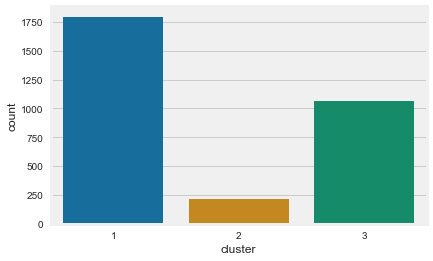

In [29]:
# view numbers in each cluster
sns.countplot(phones_imptfeat_agglo.cluster, palette = 'colorblind')
plt.xticks(ticks =[0,1,2],labels = ['1','2','3'])
plt.show()

In [30]:
# view mean values by cluster
stats_agglo = phones_imptfeat_agglo.groupby('cluster').mean()
stats_agglo.head()

,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty
cluster,,,,,,,,,
0,491.024800,63.055888,51.162535,108.073426,4.730212,0.132564,0.0,0.0,1.000000
1,154.809981,-58.450486,17.146449,72.039533,2.341121,0.441589,1.0,1.0,0.238318
2,194.149992,23.436218,21.437708,118.271184,1.636620,0.117878,0.0,0.0,0.000000


- Results are very close to KMeans results

### Model Selection and Conclusion 

**KMeans** and **Agglomerative Clustering** equally well on the dataset, with the best silhouette scores on both models at 0.6086, with 3 clusters formed. 

Looking at neighbouring cluster numbers, KMeans did better, so we will move forward with **KMeans**.

In [31]:
phones_imptfeat_km['cluster'].value_counts()

1    1794
2    1065
0     214
Name: cluster, dtype: int64

In [32]:
#change cluster number allocation
phones_imptfeat_km.loc[phones_imptfeat_km['cluster']==0, 'cluster'] = 3

In [33]:
phones_imptfeat_km['cluster'].value_counts()

1    1794
2    1065
3     214
Name: cluster, dtype: int64

### Save data

In [35]:
phones_imptfeat_km.to_csv("../data/phones_clustered.csv", index = False)

### References

"DBSCAN Python Example: The Optimal Value For Epsilon (EPS)" (Maklin, 2019)
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

"Agglomerative Hierarchical Clustering"(Datanovia, n.d.)
https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/